In [3]:
import os
import pickle
import time
import spacy
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import seaborn as sns
sns.set()
import pandas as pd
import collections
import pickle
import re
import json
from sklearn.feature_extraction.text import TfidfVectorizer

Load custom libraries

In [4]:
import os, sys
from google.colab import drive
drive.mount('/content/drive', force_remount=True)
nb_path = '/content/notebooks'
# os.symlink('/content/drive/My Drive/Colab Notebooks', nb_path)
sys.path.insert(0,nb_path)

ModuleNotFoundError: No module named 'google.colab'

In [5]:
with open('./company_data.pickle', 'rb') as f:
  company_data = pickle.load(f)

In [6]:
company_data.keys()

dict_keys(['data', 'target', 'target_names', 'name2idx', 'filename'])

In [7]:
# uncomment if first time use
# !pip install mxnet-cu101 --target=$nb_path 

import mxnet as mx
from mxnet.gluon import nn, loss as gloss, rnn
from mxnet.gluon import data as gdata
from mxnet import gluon
from mxnet import nd,init
from mxnet.contrib import text
from mxnet import autograd

In [8]:
data_dir = '/content/drive/MyDrive/nlp_data/cbs'
def read(filename):
  with open(os.path.join(data_dir, filename), mode='br') as f:
    return pickle.load(f)
def save(obj,filename):
  with open(os.path.join(data_dir, filename), mode='wb') as f:
    return pickle.dump(obj, f)


In [9]:
df = pd.DataFrame({'text': company_data['data'], 'target': company_data['target'], 'filename': company_data['filename']})
df.head()

,text,target,filename
0,Personenalarmering - Noodgevallen.com <style>....,9,100025
1,Kunst van Paul - portretten · schilderijen · t...,17,100054
2,"Brillen, contactlezen en oogzorg - Heiming Abe...",6,100065
3,Leeuwens Schilderbedrijf\t\t\t\t\t\t\tHome\t\t...,5,100133
4,0161 Events - Home 0161 EventsRegionale evenem...,17,100142


In [10]:
df = df.sample(frac=1)
df.head()

,text,target,filename
11922,Home - Coach aan Boord HomeCoachingstrajectenU...,16,595570
4780,iMorang ICT SolutionsSterk in maatwerk softwar...,8,681629
13805,Enriching MomentsContact FormNameCompany nameC...,18,489353
6822,Me&Maureen - Impact by Experience!Me and Maure...,9,459700
19156,info@allerleiklussen.nl 0521-589257 Toggle nav...,6,435558


In [11]:
X, Y = list(df['text']), list(df['target'])

In [12]:
out_dim = len(set(Y))
out_dim

19

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


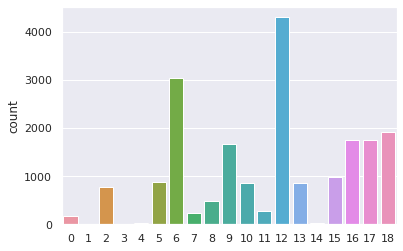

In [15]:
sns.countplot(Y)

In [10]:
n_train = 15000
X_train, Y_train = X[:n_train], Y[:n_train]
X_test, Y_test = X[n_train:], Y[n_train:]

Dimension after tdidf

In [2]:
import spacy
nlp = spacy.load('nl_core_news_sm')

In [41]:
token.

Personenalarmering

In [ ]:
token.is

In [52]:
print(nlp.pipe_names)

['tagger', 'parser', 'ner']


In [74]:
def tokenize(texts):
    noun_list = []
    verb_list = []
    start = time.time()
    for i, doc in enumerate(nlp.pipe(texts, disable=["parser", "ner"])):
        nouns, verbs = [], []
        if doc.lang_ == 'nl':
            for token in doc:
                if token.pos_ == "NOUN" and token.is_alpha and len(token) > 2:
                    nouns.append(token.lemma_)
                if token.pos_ == 'VERB':
                    verbs.append(token.lemma_)
            noun_list.append(" ".join(nouns))
            verb_list.append(" ".join(verbs))
    total_time = time.time()-start
    print("Finished processing %d docs, total time cost: %.3fs, per doc: %.3fs" %(len(texts), total_time, total_time / len(texts)))
    return noun_list, verb_list
    

nouns , verbs = tokenize(df['text'])

Finished processing 20000 docs, total time cost: 873.094s, per doc: 0.044s


In [78]:
df['nouns'] = nouns
df['verbs'] = verbs
df.head()

,text,target,filename,nouns,verbs
11922,Home - Coach aan Boord HomeCoachingstrajectenU...,16,595570,coach contact stuurman wal stuurman boord coac...,zijn moeten worden uitvoeren kunnen leren kunn...
4780,iMorang ICT SolutionsSterk in maatwerk softwar...,8,681629,solutionssterk maatwerk automatisering onderhoud,
13805,Enriching MomentsContact FormNameCompany nameC...,18,489353,enriching formnamecompany,
6822,Me&Maureen - Impact by Experience!Me and Maure...,9,459700,storie experiencecelebrating year heinekenom b...,
19156,info@allerleiklussen.nl 0521-589257 Toggle nav...,6,435558,overzichtschilderklussenklik overzichtallerlei...,navigationhomeallerleibuitenklussenschilderklu...


In [84]:
df['nouns'] = nouns
df['verbs'] = verbs

In [ ]:
with open('./noun_verb_df.pickle', 'wb+') as f:
    df.to_pickle(f)